In [ ]:
import requests
import csv
url = 'https://openapi.twse.com.tw/v1/opendata/t187ap05_L'
data = requests.get(url)
dj = data.json()
with open('股票.csv','w',encoding='utf-8') as f:
    fieldnames = ['公司代號','公司名稱','出表日期','營業收入-上月比較增減(%)','營業收入-上月營收','營業收入-去年同月增減(%)','營業收入-去年當月營收','營業收入-當月營收','產業別','累計營業收入-前期比較增減(%)','累計營業收入-去年累計營收','累計營業收入-當月累計營收','資料年月','備註']
    dict_writer = csv.DictWriter(f,fieldnames=fieldnames)
    dict_writer.writeheader()
    for i in dj:
        dict_writer.writerow(i)





In [ ]:
with open('yahoo ent.txt','wb') as f:
    f.write(html.content)

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://tw.news.yahoo.com/entertainment/?guccounter=1'
html = requests.get(url)
html.encoding = 'utf-8'
sp = BeautifulSoup(html.text,'html.parser')
data = sp.find_all('a',href =  True)
print(type(sp))
print(type(data))
# print(data)
for i in data:
    href = i.get('href')
    text = i.text.strip()
    print(text)
    print(href)



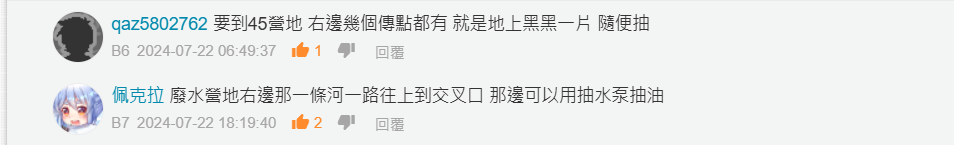

In [4]:
import tkintermapview as tkmap
address = tkintermapview.convert_address_to_coordinates("United Kingdom")


Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=United+Kingdom&format=jsonv2&addressdetails=1&limit=1


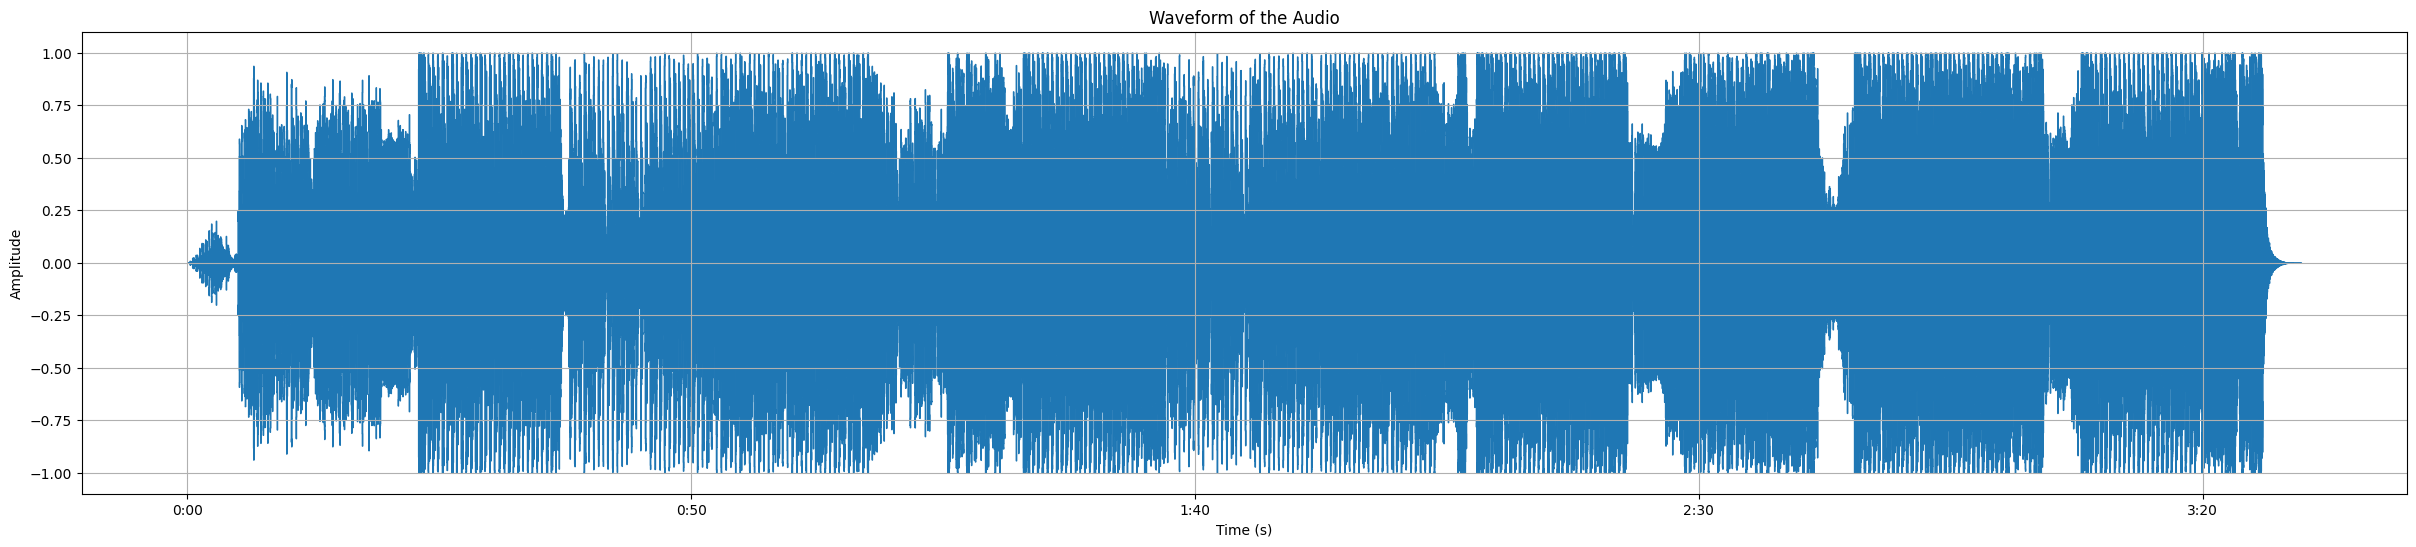

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 讀取音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"  # 替換為音頻文件的路徑
y, sr = librosa.load(audio_file, sr=None)  # y是波形數據，sr是取樣率

# 創建波形圖
plt.figure(figsize=(30, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display, Audio

# 加載音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"
y, sr = librosa.load(audio_file, sr=None)

# 創建波形圖
def plot_waveform(position=0.0):
    # 當前位置，將其轉換為樣本位置
    sample_position = int(position * len(y))

    # 繪製波形
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of the Audio')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # 在波形上繪製進度條（顯示音樂播放位置）
    plt.axvline(x=position, color='r', linestyle='--', label='Current Playback Position')
    plt.legend()
    plt.grid(True)

    # 顯示圖形
    plt.show()

    # 播放音樂（播放音樂從當前位置開始）
    display(Audio(y[sample_position:], rate=sr))

# 創建交互式滑塊
slider = FloatSlider(
    value=0.0,  # 初始值
    min=0.0,    # 最小值
    max=1.0,    # 最大值，1代表音樂結束
    step=0.01,  # 每次變化的步長
    description='Position:',
    continuous_update=False  # 用戶滑動時才更新
)

# 顯示交互式控制
interact(plot_waveform, position=slider)


In [2]:
import tkinter as tk
from tkinter import ttk
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from IPython.display import display, Audio
from ipywidgets import FloatSlider

# 加載音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"
y, sr = librosa.load(audio_file, sr=None)

class AudioPlayerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Audio Player with Waveform")
        self.root.geometry("800x600")

        # 創建主框架
        self.main_frame = ttk.Frame(self.root)
        self.main_frame.pack(fill=tk.BOTH, expand=True)

        # 創建播放位置滑塊
        self.slider = FloatSlider(
            value=0.0,  # 初始值
            min=0.0,    # 最小值
            max=1.0,    # 最大值，1代表音樂結束
            step=0.01,  # 每次變化的步長
            description='Position:',
            continuous_update=False  # 用戶滑動時才更新
        )
        self.slider.observe(self.update_position, names='value')

        # 顯示波形
        self.figure = plt.Figure(figsize=(10, 6), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.main_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        # 播放音樂的更新
        self.update_waveform()

    def update_waveform(self):
        # 當前位置，將其轉換為樣本位置
        position = self.slider.value
        sample_position = int(position * len(y))

        # 清除上一個波形
        self.ax.clear()

        # 繪製波形
        librosa.display.waveshow(y, sr=sr, ax=self.ax)
        self.ax.set_title('Waveform of the Audio')
        self.ax.set_xlabel('Time (s)')
        self.ax.set_ylabel('Amplitude')

        # 在波形上繪製進度條（顯示音樂播放位置）
        self.ax.axvline(x=position, color='r', linestyle='--', label='Current Playback Position')
        self.ax.legend()
        self.ax.grid(True)

        # 更新顯示
        self.canvas.draw()

    def update_position(self, change):
        # 更新播放位置並重新顯示波形
        self.update_waveform()
        
        # 播放音樂（播放音樂從當前位置開始）
        sample_position = int(change['new'] * len(y))
        display(Audio(y[sample_position:], rate=sr))

# 創建主應用窗口
root = tk.Tk()
app = AudioPlayerApp(root)

# 啟動應用
root.mainloop()


In [4]:
import tkinter as tk
from tkinter import filedialog
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class AudioPlayerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Audio Player with Drag and Drop")

        # 設置音檔和時間軸
        self.audio = None
        self.playhead_pos = 0
        self.timeframe_start = 0
        self.timeframe_end = 800  # 時間軸的寬度代表音樂的總時長

        # 設置 Canvas 並放置波形圖和播放進度條
        self.canvas = tk.Canvas(self.root, width=800, height=200)
        self.canvas.pack()

        self.playhead = self.canvas.create_line(self.playhead_pos, 100, self.playhead_pos, 150, width=2, fill="red")
        
        # 加載音檔的按鈕
        self.load_button = tk.Button(self.root, text="Load Audio", command=self.load_audio)
        self.load_button.pack()

        # 可拖動的拼圖按鈕
        self.button = tk.Button(self.root, text="Puzzle", command=self.execute_function)
        self.button_id = self.canvas.create_window(100, 50, window=self.button)

        # 綁定拖動事件
        self.canvas.tag_bind(self.button_id, '<ButtonPress-1>', self.on_button_press)
        self.canvas.tag_bind(self.button_id, '<B1-Motion>', self.on_button_drag)
        self.canvas.tag_bind(self.button_id, '<ButtonRelease-1>', self.on_button_release)

        self.start_x = None
        self.start_y = None
        self.button_position = 100  # 按鈕的初始位置

        # 播放音頻並更新進度
        self.update_playhead()

    def load_audio(self):
        # 打開檔案選擇器並選擇音檔
        file_path = filedialog.askopenfilename(filetypes=[("Audio Files", "*.mp3;*.wav")])
        
        if file_path:
            self.audio = AudioSegment.from_file(file_path)
            self.plot_waveform()

    def plot_waveform(self):
        if not self.audio:
            return
        
        # 計算音頻波形
        samples = np.array(self.audio.get_array_of_samples())
        sample_rate = self.audio.frame_rate
        time = np.arange(len(samples)) / sample_rate

        # 顯示波形圖
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(time, samples)
        ax.set_title("Audio Waveform")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Amplitude")
        
        # 清除舊的波形並繪製新波形
        if hasattr(self, 'waveform_canvas'):
            self.waveform_canvas.get_tk_widget().destroy()

        self.waveform_canvas = FigureCanvasTkAgg(fig, self.canvas)
        self.waveform_canvas.get_tk_widget().pack()

        # 顯示時間軸
        self.plot_timeframe(time)

    def plot_timeframe(self, time):
        # 顯示時間軸
        fig, ax = plt.subplots(figsize=(10, 1))
        ax.plot(time, np.zeros_like(time), color="black")
        ax.set_xlim(0, time[-1])
        ax.set_yticks([])
        ax.set_xticks(np.arange(0, time[-1], step=1))
        
        if hasattr(self, 'timeframe_canvas'):
            self.timeframe_canvas.get_tk_widget().destroy()

        self.timeframe_canvas = FigureCanvasTkAgg(fig, self.canvas)
        self.timeframe_canvas.get_tk_widget().pack()

    def on_button_press(self, event):
        # 記錄拖動開始的位置
        self.start_x = event.x
        self.start_y = event.y

    def on_button_drag(self, event):
        # 計算按鈕移動的偏移量並移動按鈕
        dx = event.x - self.start_x
        self.canvas.move(self.button_id, dx, 0)
        self.start_x = event.x

        # 更新按鈕在時間軸上的位置
        self.button_position += dx

    def on_button_release(self, event):
        # 當按鈕放開時，輸出當前位置
        print(f"Button dropped at {self.button_position} on the timeframe.")

    def update_playhead(self):
        if not self.audio:
            return
        
        # 模擬播放進度條
        self.playhead_pos += 1  # 模擬播放進度
        if self.playhead_pos > self.timeframe_end:
            self.playhead_pos = self.timeframe_end

        # 更新播放進度條的位置
        self.canvas.coords(self.playhead, self.playhead_pos, 100, self.playhead_pos, 150)

        # 檢查播放進度條是否到達拼圖的邊界
        if self.playhead_pos >= self.button_position and self.playhead_pos < self.button_position + 50:
            self.execute_function()

        # 繼續更新進度
        self.root.after(100, self.update_playhead)

    def execute_function(self):
        # 當播放進度條到達拼圖時，執行功能
        print("Puzzle function triggered!")

if __name__ == "__main__":
    root = tk.Tk()
    app = AudioPlayerApp(root)
    root.mainloop()


c:\Users\user\miniconda3\envs\venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import pygame

# 初始化 Pygame
pygame.init()

# 設定螢幕尺寸
screen = pygame.display.set_mode((800, 600))

# 設定顏色
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# 設定初始位置
x = 50
y = 50
speed = 2

# 設定遊戲運行標誌
running = True

# 遊戲循環
while running:
    # 事件處理
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # 移動矩形
    keys = pygame.key.get_pressed()
    if keys[pygame.K_LEFT]:
        x -= speed
    if keys[pygame.K_RIGHT]:
        x += speed
    if keys[pygame.K_UP]:
        y -= speed
    if keys[pygame.K_DOWN]:
        y += speed

    # 填充背景
    screen.fill(WHITE)

    # 畫出矩形
    pygame.draw.rect(screen, RED, (x, y, 50, 50))

    # 更新螢幕
    pygame.display.update()

# 退出遊戲
pygame.quit()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the Excel file
file_path = r"c:\Users\user\Desktop\AI\全台縣市電車登記數量.xlsx"  # Replace with your actual file path
data = pd.read_excel(file_path)

# Ensure the necessary columns are present
if "總登記數" in data.columns and "現有車站數" in data.columns:
    # 原始基準車站比
    base_ratio = 740
    base_total = 7206  # 假設基準數值（內湖區）

    # 計算調整後基準比例並生成目標變數
    data["調整後基準比例"] = (base_ratio / base_total) * data["總登記數"]
    data["理想車站數"] = data["總登記數"] / data["調整後基準比例"]
    data["目標"] = data["現有車站數"] - data["理想車站數"]
    data["目標"] = data["目標"].apply(lambda x: 1 if x < 0 else 0)  # 1 表示新增，0 表示減少

    # 準備特徵和目標變數
    X = data[["總登記數", "現有車站數"]]
    y = data["目標"]

    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練邏輯回歸模型
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # 預測與評估
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["減少", "新增"])

    # 提供係數與模型解釋
    coefficients = pd.DataFrame({
        "特徵": X.columns,
        "係數": model.coef_[0]
    })

    # Save the updated data with predictions to a new Excel file
    output_file_path = r"C:\Users\user\Desktop\sqlupdated_excel_file.xlsx"  # Replace with your desired file path
    data.to_excel(output_file_path, index=False, encoding="utf-8-sig")

    print("邏輯回歸分析完成！")
    print("分類報告：")
    print(report)
    print("模型係數：")
    print(coefficients)
    print(f"結果已保存至 {output_file_path}")



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 讀取資料
file_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄.xlsx'
data = pd.read_excel(file_path)

# 添加分類目標列 (1: 需要增設站點, 0: 不需要增設站點)
threshold = 740  # 比例閾值
data['需要增設'] = (data['數值'] / threshold).apply(lambda x: 1 if x >= 1 else 0)

# 定義特徵與目標
X = data[['數值']]  # 特徵：數值
y = data['需要增設']  # 目標：是否需要增設

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測並評估模型
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("模型評估報告：")
print(report)

# 為原始資料添加預測結果
data['預測結果'] = model.predict(X_scaled)

# 將更新後的資料保存到新檔案
output_file = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_預測結果.xlsx'
data.to_excel(output_file, index=False)
print(f"結果已保存到 {output_file}")


模型評估報告：
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.69      0.82        36

    accuracy                           0.85        74
   macro avg       0.89      0.85      0.85        74
weighted avg       0.88      0.85      0.85        74

結果已保存到 C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_預測結果.xlsx


模型評估報告：
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.69      0.82        36

    accuracy                           0.85        74
   macro avg       0.89      0.85      0.85        74
weighted avg       0.88      0.85      0.85        74



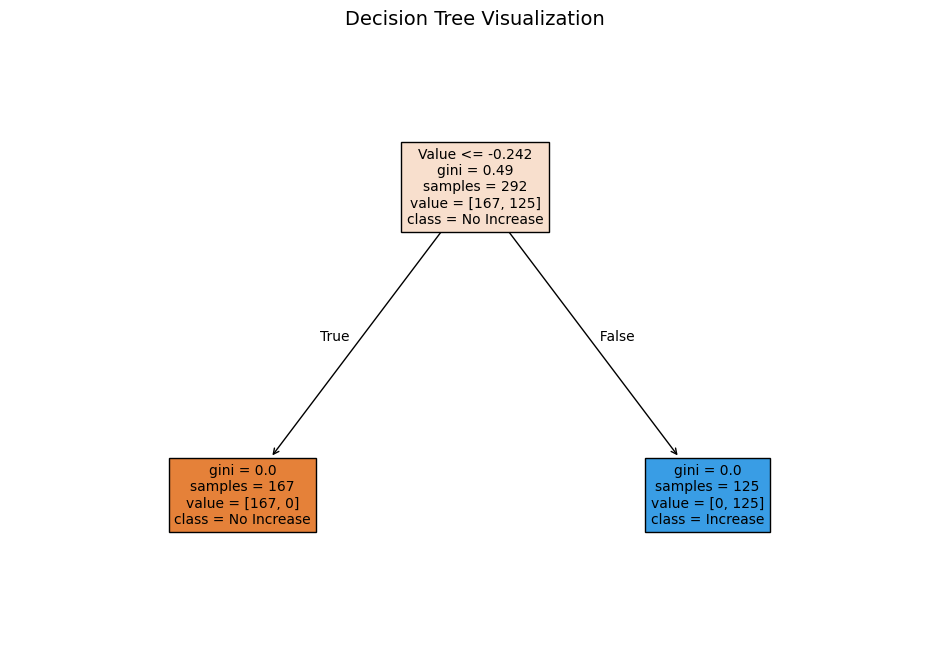

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 讀取資料
file_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄.xlsx'  # 確保這個路徑是正確的
data = pd.read_excel(file_path)

# 添加分類目標列 (1: 需要增設站點, 0: 不需要增設站點)
threshold = 740  # 比例閾值
data['需要增設'] = (data['數值'] / threshold).apply(lambda x: 1 if x >= 1 else 0)

# 定義特徵與目標
X = data[['數值']]  # 特徵：數值
y = data['需要增設']  # 目標：是否需要增設

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測並評估模型
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("模型評估報告：")
print(report)

# 為原始資料添加預測結果
data['預測結果'] = model.predict(X_scaled)

# 保存更新後的資料
# output_file = '/mnt/data/單欄_預測結果.xlsx'
# data.to_excel(output_file, index=False)
# print(f"結果已保存到 {output_file}")

# 使用決策樹模型來輔助視覺化
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

# 繪製決策樹，使用英文名稱
plt.figure(figsize=(12, 8))
tree.plot_tree(
    decision_tree,
    feature_names=['Value'],  # 數值 -> Value
    class_names=['No Increase', 'Increase'],  # 不需要增設 -> No Increase, 需要增設 -> Increase
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


模型評估報告：
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.69      0.82        36

    accuracy                           0.85        74
   macro avg       0.89      0.85      0.85        74
weighted avg       0.88      0.85      0.85        74

結果已保存到 C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_站點調整建議.xlsx


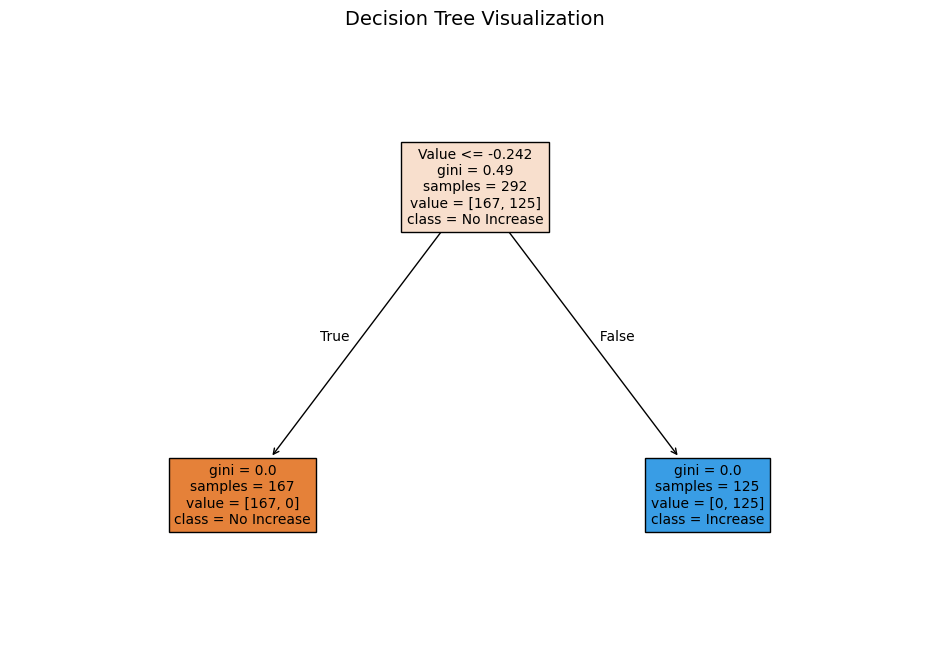

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# 讀取資料
file_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄.xlsx'  # 確保這個路徑是正確的
data = pd.read_excel(file_path)

# 添加分類目標列 (1: 需要增設站點, 0: 不需要增設站點)
threshold = 125  # 比例閾值
data['需要增設'] = (data['數值'] / threshold).apply(lambda x: 1 if x >= 1 else 0)

# 定義特徵與目標
X = data[['數值']]  # 特徵：數值
y = data['需要增設']  # 目標：是否需要增設

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測並評估模型
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("模型評估報告：")
print(report)

# 為原始資料添加預測結果
data['預測結果'] = model.predict(X_scaled)

# 計算應有站點數
data['應有站點數'] = (data['數值'] / threshold).apply(np.ceil)  # 向上取整
data['目前站點數'] = 10  # 假設每個區域目前都有 10 個站點（可替換為真實數據）

# 計算需要增設或刪減的站點數
data['站點差距'] = data['應有站點數'] - data['目前站點數']

# 添加操作建議
def operation(row):
    if row['站點差距'] > 0:
        return f"新增 {int(row['站點差距'])} 個站點"
    elif row['站點差距'] < 0:
        return f"刪減 {abs(int(row['站點差距']))} 個站點"
    else:
        return "不需改變"

data['操作建議'] = data.apply(operation, axis=1)

# 保存更新後的資料
output_file = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_站點調整建議.xlsx'
data.to_excel(output_file, index=False)
print(f"結果已保存到 {output_file}")

# 繪製決策樹，使用英文名稱
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(
    decision_tree,
    feature_names=['Value'],  # 數值 -> Value
    class_names=['No Increase', 'Increase'],  # 不需要增設 -> No Increase, 需要增設 -> Increase
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


第二階段1.0(預測結果有[0,1] 0代表減 1代表增)

Random Forest Model Accuracy: 0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        25

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42



findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 36554 (\N{CJK

預測結果已保存到 C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\預測結果.xlsx


findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found because none of the following families were found: Taipei Sans TC Beta
findfont: Generic family 'sans-serif' not found 

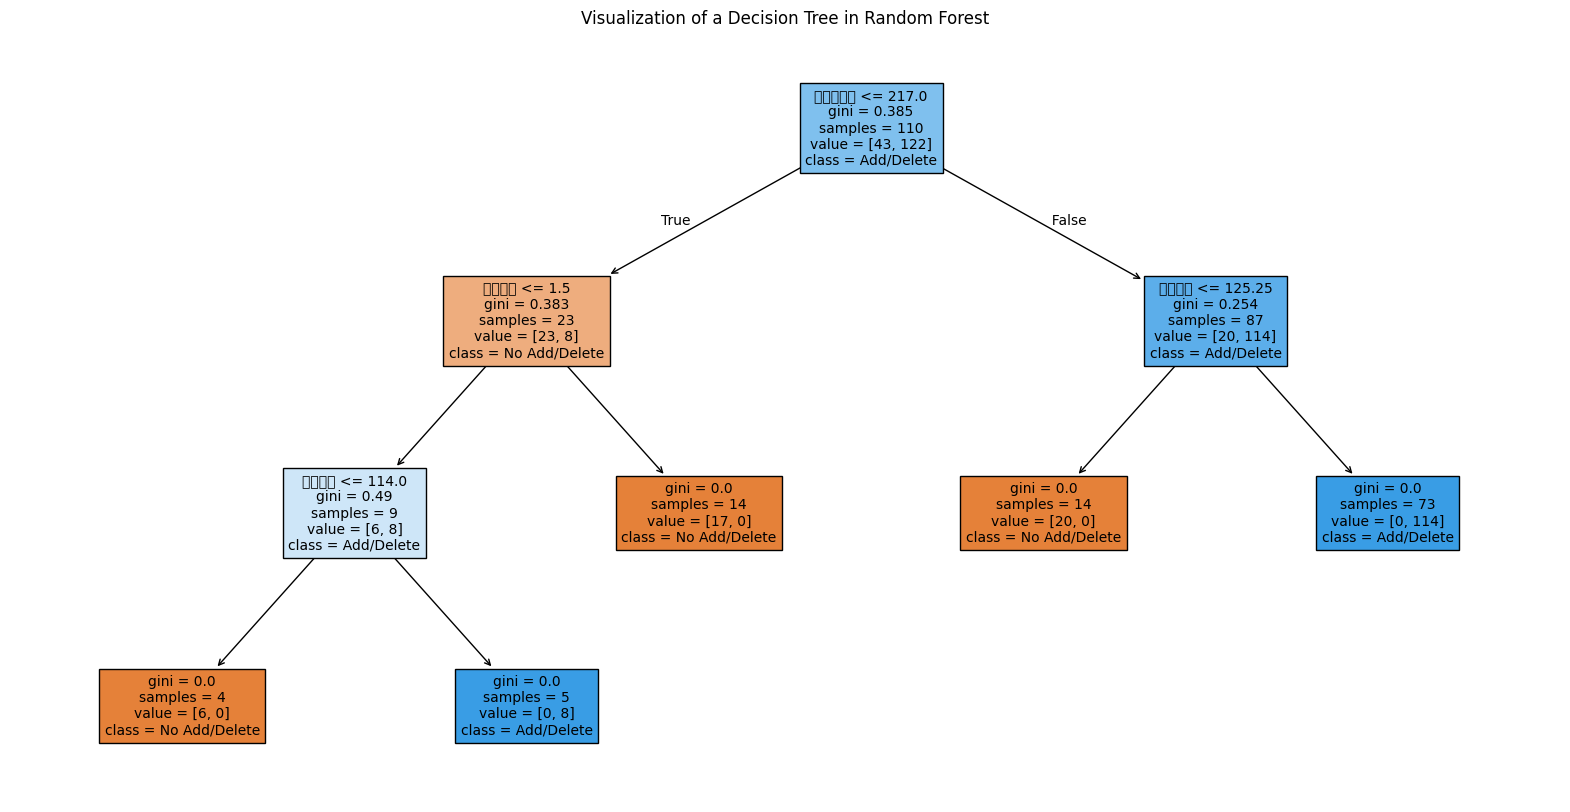

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 定義每站點支援的電動機車數
bikes_per_station = 125
file_path_vehicle = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\全台縣市電車登記數量utf8.csv'
file_path_station = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\城市與行政區站點統計utf8.csv'


# 載入資料
electric_motorcycles_data = pd.read_csv(file_path_vehicle)
station_stats_data = pd.read_csv(file_path_station)

# 提取縣市資訊
electric_motorcycles_data['縣市'] = electric_motorcycles_data['項目'].str.extract(r'_(\w+市|\w+縣)')
electric_motorcycles_data.rename(columns={"數值": "電動機車數"}, inplace=True)

# 合併資料
merged_data = pd.merge(
    electric_motorcycles_data,
    station_stats_data,
    on=["縣市", "行政區"],
    how="inner"
)

# 計算應有站點數與站點比例
merged_data['應有站點數'] = np.ceil(merged_data['電動機車數'] / bikes_per_station)
merged_data['站點比例'] = merged_data['電動機車數'] / merged_data['站點數量']
merged_data['站點差距'] = merged_data['應有站點數'] - merged_data['站點數量']
merged_data['需新增或刪減'] = (merged_data['站點差距'] > 0).astype(int)  # 1: 新增, 0: 無需新增

# 準備特徵與目標
X = merged_data[['電動機車數', '站點數量', '站點比例']]  # 特徵
y = merged_data['需新增或刪減']  # 目標

# 分割訓練與測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練隨機森林模型
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# 評估模型
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# 將預測結果添加到資料集中
merged_data['預測結果'] = rf_model.predict(X)

# 保存結果為 Excel 檔案
output_file = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\預測結果.xlsx'
merged_data.to_excel(output_file, index=False)
print(f"預測結果已保存到 {output_file}")

# 繪製隨機森林中的一顆決策樹
plt.figure(figsize=(20, 10))
plot_tree(
    rf_model.estimators_[0],  # 隨機選取一顆決策樹
    feature_names=X.columns,
    class_names=["No Add/Delete", "Add/Delete"],
    filled=True,
    fontsize=10
)
plt.title("Visualization of a Decision Tree in Random Forest")
plt.show()


第二階段2.0(新增預測結果有[0,1,2] 0代表減 1代表增 2代表不用增減)

Random Forest Model Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.93      1.00      0.96        25
           2       0.88      0.70      0.78        10

    accuracy                           0.90        42
   macro avg       0.89      0.85      0.87        42
weighted avg       0.90      0.90      0.90        42

預測結果已保存到 C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\第二階段預測增多少_結果.xlsx


c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 38651 (\N{CJK UNIFIED IDEOGRAPH-96FB}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\user\miniconda3\envs\venv\Lib\site-packages\sklearn\tree\_export.py:670: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-657

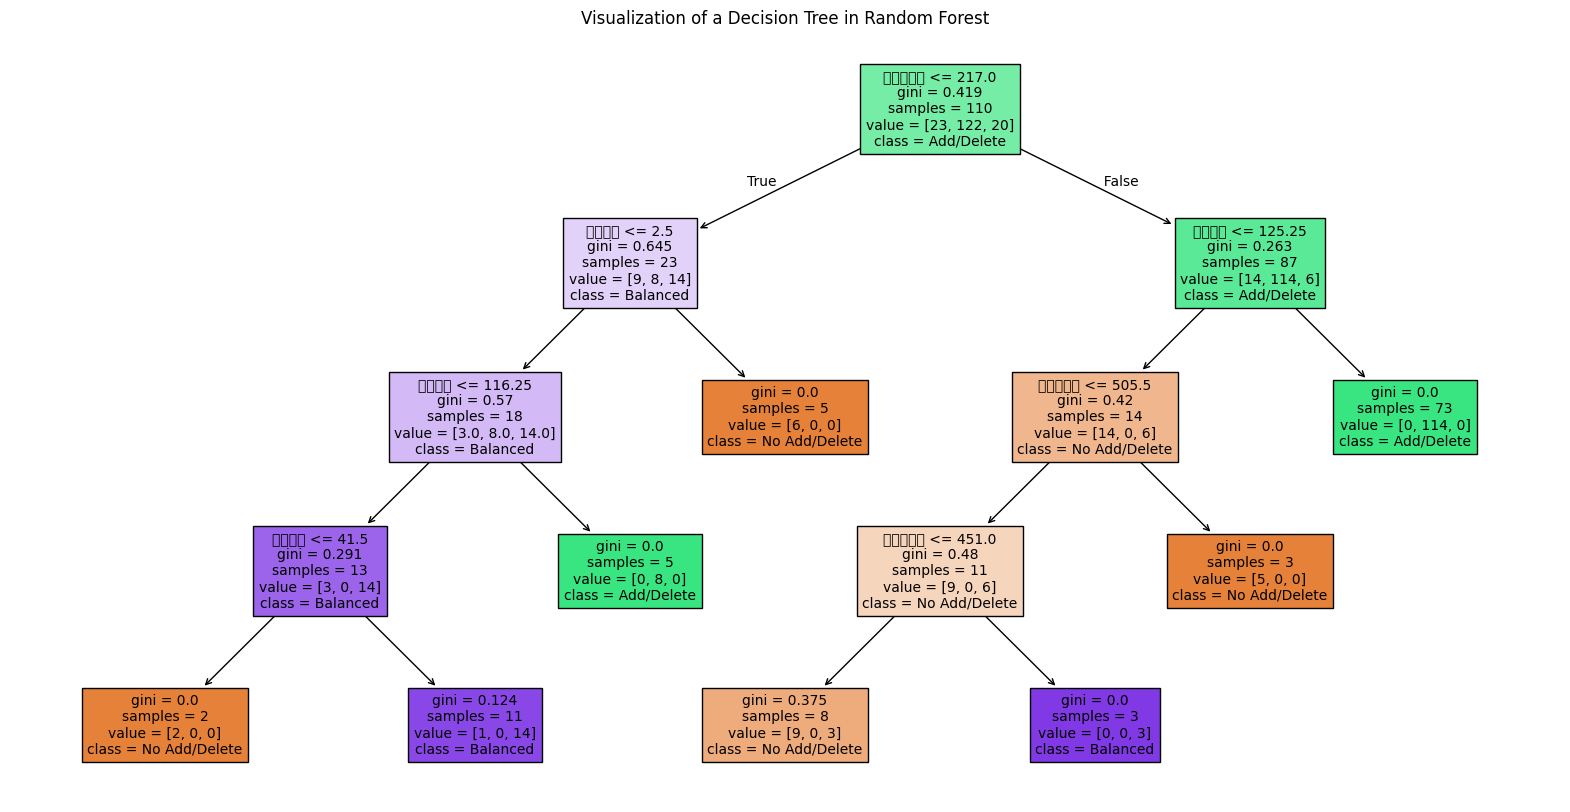

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text

# 定義每站點支援的電動機車數
bikes_per_station = 125



# 載入資料
file_path_vehicle = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\全台縣市電車登記數量utf8.csv'
file_path_station = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\城市與行政區站點統計utf8.csv'
electric_motorcycles_data = pd.read_csv(file_path_vehicle)
station_stats_data = pd.read_csv(file_path_station)

# 提取縣市資訊
electric_motorcycles_data['縣市'] = electric_motorcycles_data['項目'].str.extract(r'_(\w+市|\w+縣)')
electric_motorcycles_data.rename(columns={"數值": "電動機車數"}, inplace=True)

# 合併資料
merged_data = pd.merge(
    electric_motorcycles_data,
    station_stats_data,
    on=["縣市", "行政區"],
    how="inner"
)

# 計算應有站點數與站點比例
merged_data['應有站點數'] = np.ceil(merged_data['電動機車數'] / bikes_per_station)
merged_data['站點比例'] = merged_data['電動機車數'] / merged_data['站點數量']
merged_data['站點差距'] = merged_data['應有站點數'] - merged_data['站點數量']

# 根據站點差距設置需新增或刪減值
merged_data['需新增或刪減'] = 0  # 預設為不需要新增或刪減
merged_data.loc[merged_data['站點差距'] > 0, '需新增或刪減'] = 1  # 需要新增
merged_data.loc[merged_data['站點差距'] == 0, '需新增或刪減'] = 2  # 現有站點數與應有站點數相同

# 準備特徵與目標
X = merged_data[['電動機車數', '站點數量', '站點比例']]  # 特徵
y = merged_data['需新增或刪減']  # 目標

# 分割訓練與測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
max_depth = 4

# 訓練隨機森林模型
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=max_depth)
rf_model.fit(X_train, y_train)

# 評估模型
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# 將預測結果添加到資料集中
merged_data['預測結果'] = rf_model.predict(X)
merged_data.loc[merged_data['站點差距'] == 0, '預測結果'] = 2  # 更新預測結果，當站點數相同時為 2

# 保存結果為 Excel 檔案
output_file = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\第二階段預測增多少_結果.xlsx'
merged_data.to_excel(output_file, index=False)
print(f"預測結果已保存到 {output_file}")

# 繪製隨機森林中的一顆決策樹
plt.figure(figsize=(20, 10))
plot_tree(
    rf_model.estimators_[0],  # 隨機選取一顆決策樹
    feature_names=X.columns,
    class_names=["No Add/Delete", "Add/Delete", "Balanced"],
    filled=True,
    fontsize=10
)
plt.title("Visualization of a Decision Tree in Random Forest")
plt.show()

預測未來數量

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 讀取 Excel 檔案
file_path = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\原始資料\全台縣市電車登記數量原始資料.xlsx'
excel_data = pd.ExcelFile(file_path)

# 讀取 Sheet3 資料
sheet3_data = excel_data.parse('Sheet3')
print(sheet3_data.columns)


# 日期處理
sheet3_data['日期'] = pd.to_datetime(sheet3_data['日期'])
sheet3_data.set_index('日期', inplace=True)

# 數據清洗：替換非數字值並處理缺失值
cleaned_data = sheet3_data.replace(to_replace='-', value=np.nan)
cleaned_data = cleaned_data.apply(pd.to_numeric, errors='coerce')
threshold = 0.5 * len(cleaned_data)
cleaned_data = cleaned_data.dropna(axis=1, thresh=threshold)
cleaned_data = cleaned_data.fillna(cleaned_data.mean())

# 預測每個欄位未來新增數量
future_months = 6
predictions = {}

for column in cleaned_data.columns:
    # 準備數據
    x = np.arange(len(cleaned_data)).reshape(-1, 1)
    y = cleaned_data[column].values
    
    # 建立並訓練模型
    model = LinearRegression()
    model.fit(x, y)
    
    # 預測未來新增數量
    future_x = np.arange(len(cleaned_data), len(cleaned_data) + future_months).reshape(-1, 1)
    predictions[column] = model.predict(future_x)

# 將預測結果轉為 DataFrame
predictions_df = pd.DataFrame(predictions, index=pd.date_range(cleaned_data.index[-1], periods=future_months + 1, freq='MS')[1:])

# 輸出結果
print("每欄未來新增數量預測：")
print(predictions_df)

# 如果需要存檔
predictions_df.to_excel(r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\每欄未來新增數量預測.xlsx')


Index(['日期', '電能_新北市', '電能_新北市板橋區', '電能_新北市三重區', '電能_新北市中和區', '電能_新北市永和區',
       '電能_新北市新莊區', '電能_新北市新店區', '電能_新北市樹林區', '電能_新北市鶯歌區',
       ...
       '電能_基隆市', '電能_基隆市中山區', '電能_基隆市七堵區', '電能_基隆市暖暖區', '電能_基隆市仁愛區',
       '電能_基隆市中正區', '電能_基隆市安樂區', '電能_基隆市信義區', '電能_新竹市', '電能_嘉義市'],
      dtype='object', length=367)


C:\Users\user\AppData\Local\Temp\ipykernel_17268\4019341319.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_data = sheet3_data.replace(to_replace='-', value=np.nan)


每欄未來新增數量預測：
                   電能_新北市     電能_新北市板橋區     電能_新北市三重區     電能_新北市中和區  \
2024-11-01  106582.462112  15075.977640  11179.434783  11604.570186   
2024-12-01  107762.702493  15243.858700  11302.269565  11729.676791   
2025-01-01  108942.942875  15411.739760  11425.104348  11854.783396   
2025-02-01  110123.183256  15579.620821  11547.939130  11979.890001   
2025-03-01  111303.423637  15747.501881  11670.773913  12104.996606   
2025-04-01  112483.664019  15915.382941  11793.608696  12230.103211   

              電能_新北市永和區     電能_新北市新莊區    電能_新北市新店區    電能_新北市樹林區    電能_新北市鶯歌區  \
2024-11-01  5805.496894  12628.926708  6663.541615  4513.159006  1993.315528   
2024-12-01  5865.292783  12771.128265  6735.101338  4562.917208  2018.237495   
2025-01-01  5925.088671  12913.329822  6806.661062  4612.675409  2043.159461   
2025-02-01  5984.884560  13055.531380  6878.220786  4662.433610  2068.081428   
2025-03-01  6044.680448  13197.732937  6949.780509  4712.191812  2093.003394   
2025-04-01

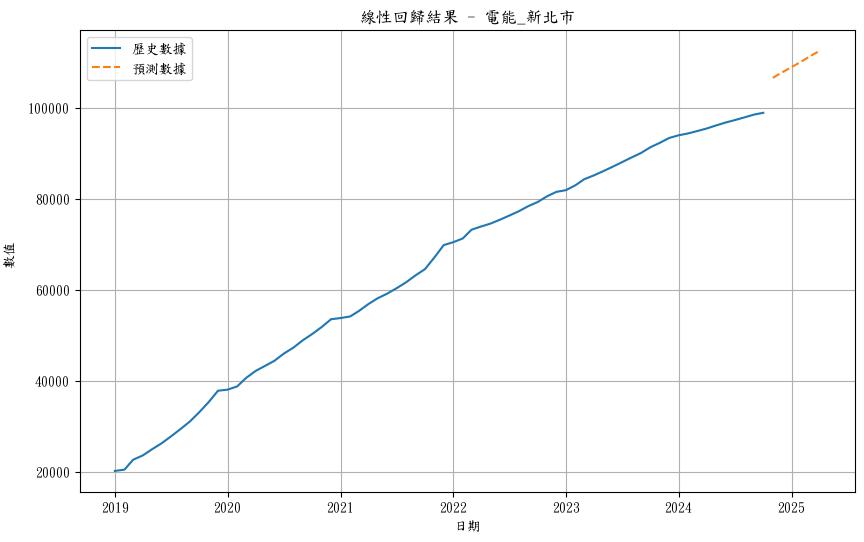

模型準確率: 0.8571428571428571
分類報告:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.86      1.00      0.93        31
           2       0.67      0.40      0.50         5

    accuracy                           0.86        42
   macro avg       0.84      0.63      0.70        42
weighted avg       0.86      0.86      0.84        42



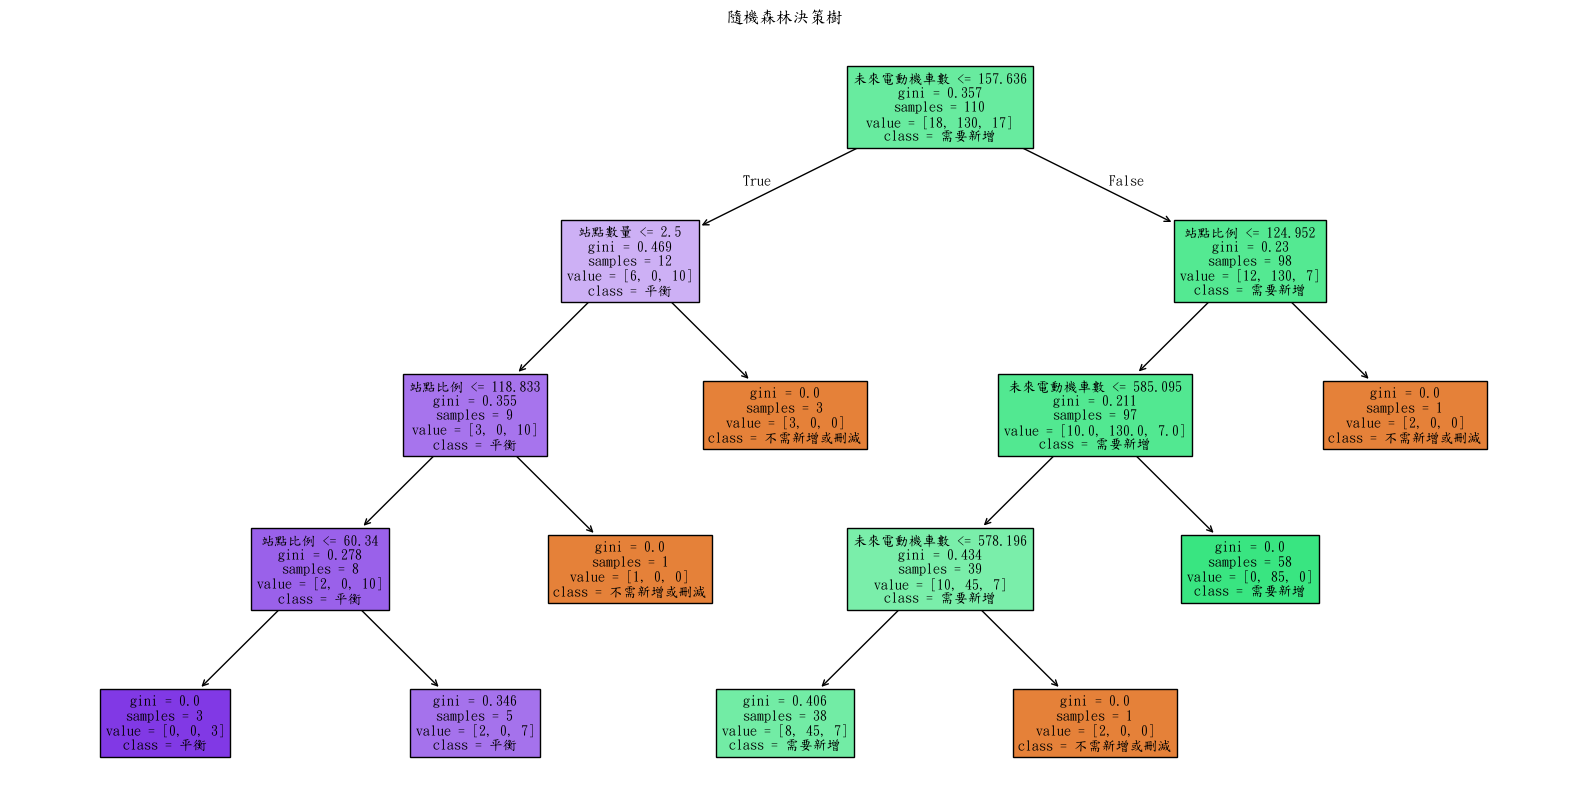

結果已保存至: C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\結果\整合後的站點需求預測結果.xlsx


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib import rcParams

# 設定中文字型
rcParams['font.family'] = ['DFKai-SB']

# 定義每站點支援的電動機車數
bikes_per_station = 125

# 加載數據
sheet3_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\原始資料\sheet3全台縣市電車登記數量原始資料.xlsx'
utf8_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\全台縣市電車登記數量utf8.csv'
station_stats_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\城市與行政區站點統計utf8.csv'

# 1. 預測未來6個月電動機車數量（線性回歸部分）
sheet3_data = pd.read_excel(sheet3_path)
sheet3_data['日期'] = pd.to_datetime(sheet3_data['日期'])
sheet3_data.set_index('日期', inplace=True)

# 清理數據
numeric_columns = sheet3_data.select_dtypes(include=[np.number]).columns
sheet3_data_cleaned = sheet3_data[numeric_columns].replace('-', np.nan)
sheet3_data_cleaned = sheet3_data_cleaned.apply(pd.to_numeric, errors='coerce').fillna(sheet3_data_cleaned.mean())

# 預測未來數據
future_months = 6
predictions_pr = {}
for column in sheet3_data_cleaned.columns:
    x_pr = np.arange(len(sheet3_data_cleaned)).reshape(-1, 1)
    y_pr = sheet3_data_cleaned[column].values
    model_pr = LinearRegression()
    model_pr.fit(x_pr, y_pr)
    future_x_pr = np.arange(len(sheet3_data_cleaned), len(sheet3_data_cleaned) + future_months).reshape(-1, 1)
    predictions_pr[column] = model_pr.predict(future_x_pr)

predictions_df_pr = pd.DataFrame(predictions_pr, index=pd.date_range(sheet3_data_cleaned.index[-1], periods=future_months + 1, freq='MS')[1:])
future_predictions_dict_fixed = {str(k): v for k, v in predictions_df_pr.iloc[-1].to_dict().items()}

# 繪製線性回歸圖
column_name = sheet3_data_cleaned.columns[0]
x = np.arange(len(sheet3_data_cleaned)).reshape(-1, 1)
y = sheet3_data_cleaned[column_name].values
model = LinearRegression()
model.fit(x, y)
future_y = model.predict(future_x_pr)

plt.figure(figsize=(10, 6))
plt.plot(sheet3_data_cleaned.index, y, label='歷史數據')
plt.plot(pd.date_range(sheet3_data_cleaned.index[-1], periods=future_months + 1, freq='MS')[1:], future_y, label='預測數據', linestyle='--')
plt.title(f"線性回歸結果 - {column_name}")
plt.xlabel("日期")
plt.ylabel("數值")
plt.legend()
plt.grid()
plt.show()

# 2. 合併現有數據與站點統計（隨機森林部分）
electric_motorcycles_data = pd.read_csv(utf8_path)
station_stats_data = pd.read_csv(station_stats_path)

electric_motorcycles_data['縣市'] = electric_motorcycles_data['項目'].str.extract(r'_(\w+市|\w+縣)')
electric_motorcycles_data.rename(columns={"數值": "電動機車數"}, inplace=True)

merged_data = pd.merge(electric_motorcycles_data, station_stats_data, on=["縣市", "行政區"], how="inner")

# 定義每站點支援的電動機車數
bikes_per_station = 125

# 計算站點需求數據
merged_data['未來電動機車數'] = merged_data['項目'].map(future_predictions_dict_fixed).fillna(0)
merged_data['未來應有站點數'] = np.ceil(merged_data['未來電動機車數'] / bikes_per_station)
merged_data['站點比例'] = merged_data['未來電動機車數'] / merged_data['未來應有站點數']
merged_data['未來站點差距'] = merged_data['未來應有站點數'] - merged_data['站點數量']
merged_data['需新增或刪減'] = 0
merged_data.loc[merged_data['未來站點差距'] > 0, '需新增或刪減'] = 1
merged_data.loc[merged_data['未來站點差距'] == 0, '需新增或刪減'] = 2

# 隨機森林模型
X = merged_data[['未來電動機車數', '站點數量', '站點比例']]
y = merged_data['需新增或刪減']

# 分割訓練與測試數據
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練隨機森林模型
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=4)
rf_model.fit(X_train, y_train)

# 評估模型
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"模型準確率: {accuracy}")
print(f"分類報告:\n{report}")

# 繪製隨機森林中的一顆決策樹
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=["不需新增或刪減", "需要新增", "平衡"], filled=True, fontsize=10)
plt.title("隨機森林決策樹")
plt.show()

# 保存結果
output_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\結果\整合後的站點需求預測結果.xlsx'
merged_data.to_excel(output_path, index=False)
print(f"結果已保存至: {output_path}")


In [10]:
import pandas as pd
import numpy as np
sheet3_path = r'C:\Users\user\Desktop\程式在這裡\GitHub\TVDI_python\testing\AI\原始資料\sheet3全台縣市電車登記數量原始資料.xlsx'
sheet3_data = pd.read_excel(sheet3_path)
sheet3_data['日期'] = pd.to_datetime(sheet3_data['日期'])+pd.offsets.MonthEnd(0)
display(sheet3_data.iloc[:10, :5])
numeric_columns = sheet3_data.select_dtypes(include=[np.number]).columns
print(numeric_columns)

,日期,電能_新北市,電能_新北市板橋區,電能_新北市三重區,電能_新北市中和區
0,2019-01-31,20156,2826,2126,2345
1,2019-02-28,20443,2865,2154,2377
2,2019-03-31,22617,3163,2435,2619
3,2019-04-30,23558,3297,2542,2726
4,2019-05-31,24905,3522,2706,2892
5,2019-06-30,26225,3684,2844,3053
6,2019-07-31,27714,3910,2996,3220
7,2019-08-31,29335,4103,3161,3406
8,2019-09-30,31035,4342,3333,3605
9,2019-10-31,33044,4633,3556,3848
